In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os, re, nltk, contextlib, warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
from nltk.corpus import stopwords
import kagglehub

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
nltk.download('stopwords', quiet=True)

True

In [9]:
with contextlib.redirect_stdout(None):
    path = kagglehub.dataset_download("yasserh/amazon-product-reviews-dataset")

file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, file))
print(df)

Using Colab cache for faster access to the 'amazon-product-reviews-dataset' dataset.
                        id       asins   brand  \
0     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
1     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
2     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
3     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
4     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
...                    ...         ...     ...   
1592  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1593  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1594  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1595  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1596  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   

                                             categories colors  \
0                            Amazon Devices,mazon.co.uk    NaN   
1                            Amazon Devices,mazon.co.uk    NaN   
2                            Amazon Devices,mazon.co.uk    NaN   
3                            Amazon Devices,mazon.

In [ ]:
df = df.dropna(subset=['reviews.text','reviews.rating'])
df['reviews.text'] = df['reviews.text'].astype(str)

def clean_text(t):
    t = re.sub(r'[^a-zA-Z\s]', '', t.lower())
    return ' '.join([w for w in t.split() if w not in stopwords.words('english')])

df['clean_text'] = df['reviews.text'].apply(clean_text)
df['sentiment'] = df['reviews.rating'].apply(lambda x: 'positive' if x>=4 else ('negative' if x<=2 else 'neutral'))
print(df)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf, X_test_tfidf = tfidf.fit_transform(X_train), tfidf.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(y_pred)

Accuracy: 0.8898305084745762

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        15
     neutral       1.00      0.48      0.65        21
    positive       0.88      1.00      0.94       200

    accuracy                           0.89       236
   macro avg       0.63      0.49      0.53       236
weighted avg       0.84      0.89      0.85       236



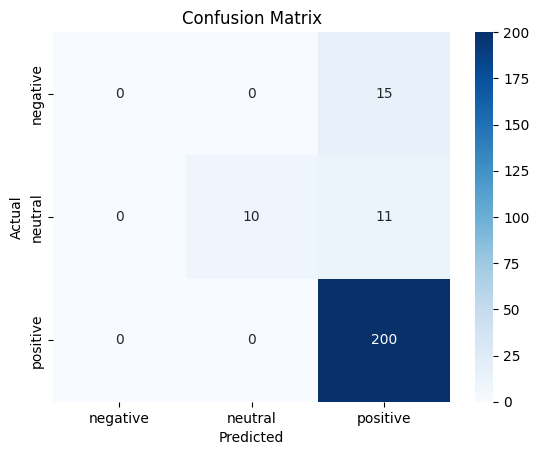

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix'); plt.show()

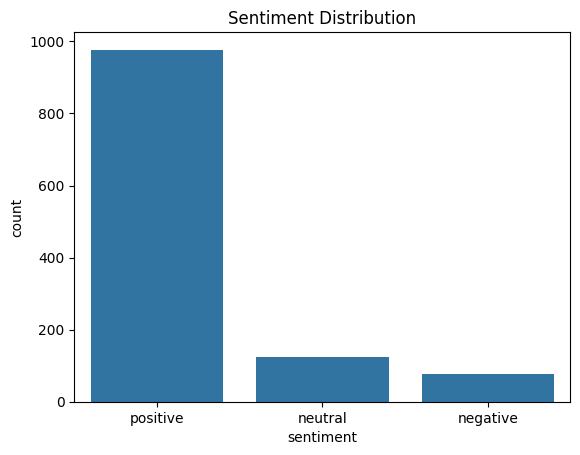

In [8]:
sns.countplot(x='sentiment', data=df); plt.title('Sentiment Distribution'); plt.show()